In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
## Step 1: Load and Preprocess Data
# Define transformations for images
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [3]:
# Load Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.3MB/s]


In [4]:
# Get the shape of the first image in the training dataset
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))

torch.Size([1, 28, 28])
60000


In [5]:
# Get the shape of the first image in the test dataset
image, label = test_dataset[0]
print(image.shape)
print(len(test_dataset))

torch.Size([1, 28, 28])
10000


In [6]:
# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [7]:
class CNNClassifier(nn.Module):
  def __init__(self): # Define __init__ method explicitly
    super(CNNClassifier, self).__init__() # Call super().__init__() within __init__
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1) # Correct argument names
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)  # Correct argument names
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1) # Correct argument names
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(128 * 3 * 3, 128) # Adjust input size for Linear layer (Calculation needs update if image size changed)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x))) # Correctly call self.conv1
    x = self.pool(torch.relu(self.conv2(x)))  # Correctly call self.conv2
    x = self.pool(torch.relu(self.conv3(x))) # Correctly call self.conv3
    x = x.view(x.size(0), -1) # Flatten the tensor
    x = torch.relu(self.fc1(x)) # Correctly call self.fc1
    x = torch.relu(self.fc2(x)) # Correctly call self.fc2
    x = self.fc3(x)
    return x

In [8]:
from torchsummary import summary

# Initialize model
model = CNNClassifier()

# Move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

# Print model summary
print('Name:HARISHA S')
print('Register Number:212223040063')
summary(model, input_size=(1, 28, 28))

Name:HARISHA S
Register Number:212223040063
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.95
Estimated Total Size (MB): 1.37

In [9]:
# Initialize model, loss function, and optimizer
model =CNNClassifier()
criterion =nn.CrossEntropyLoss()
optimizer =optim.Adam(model.parameters(), lr=0.001)

In [10]:
def train_model(model, train_loader, optimizer, criterion, num_epochs=3):
    print('Name:HARISHA S')
    print('Register Number:212223040063')

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Print only once per epoch
        avg_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

In [11]:
# Train the model
train_model(model, train_loader, optimizer, criterion)

Name:HARISHA S
Register Number:212223040063
Epoch [1/3], Loss: 0.4644
Epoch [2/3], Loss: 0.2859
Epoch [3/3], Loss: 0.2380


In [12]:
## Step 4: Test the Model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name:HARISHA S')
    print('Register Number:212223040063')
    print(f'Test Accuracy: {accuracy:.4f}')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print('Name:HARISHA S')
    print('Register Number:212223040063')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print('Name:HARISHA S')
    print('Register Number:212223040063')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

Name:HARISHA S
Register Number:212223040063
Test Accuracy: 0.9060
Name:HARISHA S
Register Number:212223040063


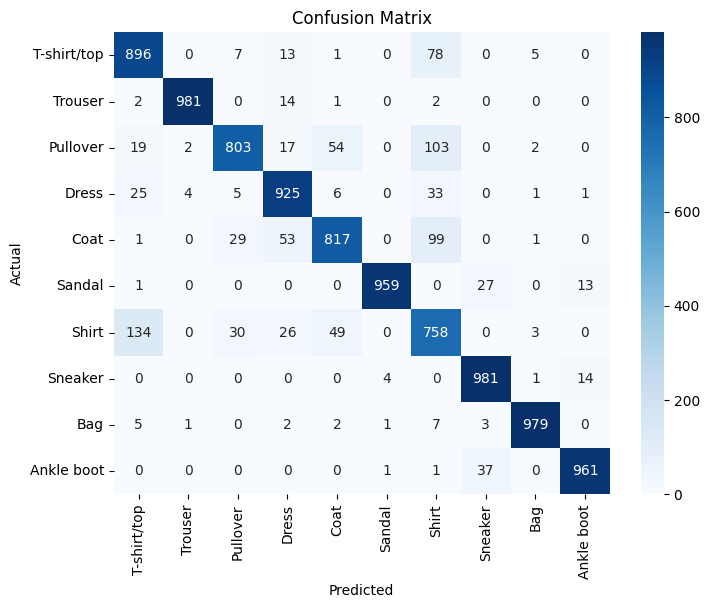

Name:HARISHA S
Register Number:212223040063
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.90      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.92      0.80      0.86      1000
       Dress       0.88      0.93      0.90      1000
        Coat       0.88      0.82      0.85      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.70      0.76      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [13]:
# Evaluate the model
test_model(model, test_loader)

In [16]:
## Step 5: Predict on a Single Image
import matplotlib.pyplot as plt
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)
    class_names = dataset.classes

    # Display the image
    print('Name:HARISHA S')
    print('Register Number:212223040063')
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

Name:HARISHA S
Register Number:212223040063


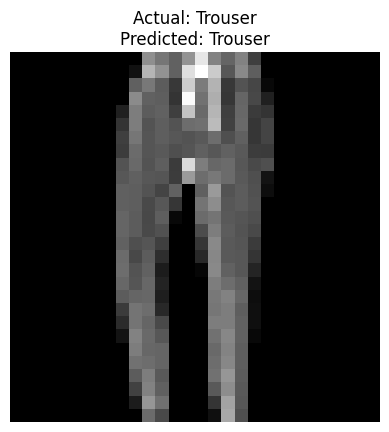

Actual: Trouser, Predicted: Trouser


In [17]:
# Example Prediction
predict_image(model, image_index=80, dataset=test_dataset)